<font size="6">**I.Perkenalan**</font>

Nama: Bintang Muhammad <br>
Course: Data Science <br>
Batch: 6 <br>


<font size="6">**II.Import Library**</font>

In [4]:
#import libraries

import pandas as pd
import numpy as np
import sympy as sy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

<font size="6">**III.Data Loading**</font>

In [5]:
#original data
df1=pd.read_csv('ks-projects-201801.csv')

In [6]:
#create copy and new df
df18=df1.copy().sort_values(by='launched',ascending=False).reset_index(drop=True)

In [10]:
#view data
df18.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1339173863,Spirits of the Forest,Tabletop Games,Games,EUR,2018-01-26,20000.0,2018-01-02 15:02:31,3694.0,live,82,ES,4435.93,4483.39,24273.91
1,1830173355,Digital Dagger Coin,Art,Art,USD,2018-02-01,650.0,2018-01-02 14:38:17,7.0,live,1,US,7.00,7.00,650.00
2,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,USD,2018-01-16,10000.0,2018-01-02 14:17:46,165.0,live,3,US,165.00,165.00,10000.00
3,974738310,EVO Planner: The World's First Personalized Fl...,Product Design,Design,USD,2018-02-09,15000.0,2018-01-02 14:15:38,269.0,live,8,US,269.00,269.00,15000.00
4,1486845240,Americas Got Talent - Serious MAK,Hip-Hop,Music,USD,2018-01-16,500.0,2018-01-02 14:13:09,0.0,live,0,US,0.00,0.00,500.00


In [8]:
df18.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

| Features | Description |
|-----------|-----------|
| ID: | ID of projects
|name:| Name of Projects
|category:| Category of projetcs
|main_category:| Main category of projects
|currency:| Currency used for funding the projects
|deadline:| Deadline of funding the projects
|goal:| Amount of money needed for the projects
|launched:| Launching date of the projects
|pledged:| Money pledged for the projects
|state:| Project status
|backers:| Number of people who fund the projects
|country:| Country origin of the projects
|usd pledged:| conversion in US dollars of the pledged column (conversion done by kickstarter).
|usd_pledged_real:| usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).
|usd_goal_real:| conversion in US dollars of the goal column (conversion from Fixer.io API).

<font size="6">**IV.Data Cleaning**</font>

In [207]:
#view data
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [208]:
#view null values
df18.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [209]:
#drop null values
df18=df18.dropna()

In [210]:
#check null values again
df18.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [211]:
# check duplicated rows

df18.duplicated().sum()

0

- No duplicate rows in the data

In [212]:
df18.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1339173863,Spirits of the Forest,Tabletop Games,Games,EUR,2018-01-26,20000.0,2018-01-02 15:02:31,3694.0,live,82,ES,4435.93,4483.39,24273.91
1,1830173355,Digital Dagger Coin,Art,Art,USD,2018-02-01,650.0,2018-01-02 14:38:17,7.0,live,1,US,7.00,7.00,650.00
2,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,USD,2018-01-16,10000.0,2018-01-02 14:17:46,165.0,live,3,US,165.00,165.00,10000.00


In [213]:
#change data type

df18=df18.astype({'deadline':'datetime64[ns]','launched':'datetime64[ns]'})

In [214]:
#view data by date
df18.sort_values(by='launched').head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378660,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,700.00
378654,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,2010-08-14,15000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,15000.00
378655,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,5000.00
378659,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,4000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,4000.00
378657,69489148,Student Auditions Music 2015,Publishing,Publishing,CHF,2015-10-31,1900.0,1970-01-01 01:00:00,0.0,suspended,0,CH,0.0,0.0,1905.97
378656,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,10000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,10000.00
378658,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,500.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,500.00
378653,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,2009-05-31,1000.0,2009-04-21 21:02:48,625.0,failed,30,US,625.0,625.0,1000.00
378652,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,2009-07-20,80000.0,2009-04-23 00:07:53,22.0,failed,3,US,22.0,22.0,80000.00
378651,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,2009-04-24 21:52:03,35.0,successful,3,US,35.0,35.0,20.00


- There is a projects that was launched on 1970, this is weird,since kickstarter is a Technology company, and at that time Technology does not have much.
- Based on my search, kickstartetr was launched on 28th April 2009, so there is a possibility that if a project is before that is a fake/dummy.
- But i'm going to assume that they have a project the launch date to 'interest' the market, so i'm just gonna delete the project before April 2009.

In [215]:
#filter the data
df18 = df18[(df18['launched']>= "2009-04")]

In [216]:
#check data again
df18.sort_values(by='launched',ascending=True)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378653,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,2009-05-31,1000.0,2009-04-21 21:02:48,625.0,failed,30,US,625.00,625.00,1000.00
378652,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,2009-07-20,80000.0,2009-04-23 00:07:53,22.0,failed,3,US,22.00,22.00,80000.00
378651,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,2009-04-24 21:52:03,35.0,successful,3,US,35.00,35.00,20.00
378650,727286,Offline Wikipedia iPhone app,Software,Technology,USD,2009-07-14,99.0,2009-04-25 17:36:21,145.0,successful,25,US,145.00,145.00,99.00
378649,1622952265,Pantshirts,Fashion,Fashion,USD,2009-05-26,1900.0,2009-04-27 14:10:39,387.0,failed,10,US,387.00,387.00,1900.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1486845240,Americas Got Talent - Serious MAK,Hip-Hop,Music,USD,2018-01-16,500.0,2018-01-02 14:13:09,0.0,live,0,US,0.00,0.00,500.00
3,974738310,EVO Planner: The World's First Personalized Fl...,Product Design,Design,USD,2018-02-09,15000.0,2018-01-02 14:15:38,269.0,live,8,US,269.00,269.00,15000.00
2,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,USD,2018-01-16,10000.0,2018-01-02 14:17:46,165.0,live,3,US,165.00,165.00,10000.00
1,1830173355,Digital Dagger Coin,Art,Art,USD,2018-02-01,650.0,2018-01-02 14:38:17,7.0,live,1,US,7.00,7.00,650.00


<font size="6">**V.Data Exploration**</font>

**Looking at Outliers with boxplot**

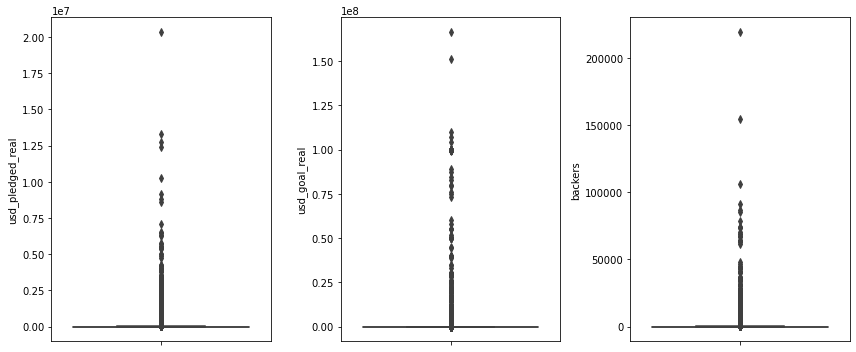

In [217]:
#memisahkan kolom yang ingin dilihat
nums=['usd_pledged_real','usd_goal_real','backers']

#mengiterate box plot untuk melihat outliers
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df18[nums[i]], orient='v')
    plt.tight_layout()

- Berdasarkan gambar boxplot, ketiga data memiliki outliers yang sangat banyak
- Ketiga fitur ini seluruhnya positively skewed

In [218]:
#group data berdasarkan main category, menampilkan uang yg di pledged
dfmc=df18.groupby(['main_category']).sum()[['usd_pledged_real']].sort_values(by='usd_pledged_real', ascending=False).reset_index()

In [219]:
#show data
dfmc

,main_category,usd_pledged_real
0,Games,7.412726e+08
1,Design,7.342065e+08
2,Technology,6.860934e+08
3,Film & Video,3.898561e+08
4,Music,1.937390e+08
5,Publishing,1.335201e+08
6,Fashion,1.303219e+08
7,Food,1.258062e+08
8,Art,9.068023e+07
9,Comics,7.151839e+07


- Top 3 Kategori yang nilai pledgednya paling banyak adalah Games, Design dan technology. 
- Top 3 Kategori yang nilai pledgednya paling sedikit adalah Journalism, Dance dan Crafts. 

In [220]:
#group data berdasarkan main category, menampilkan uang yg menjadi goal
dfmcg=df18.groupby(['main_category']).sum()[['usd_goal_real']].sort_values(by='usd_goal_real', ascending=False).reset_index()

In [221]:
#show data
dfmcg

,main_category,usd_goal_real
0,Film & Video,5.249833e+09
1,Technology,3.327914e+09
2,Games,1.582558e+09
3,Design,1.258992e+09
4,Food,1.206404e+09
5,Art,1.103508e+09
6,Publishing,9.866747e+08
7,Music,7.885631e+08
8,Fashion,5.112420e+08
9,Journalism,4.089290e+08


- Top 3 Kategori yang nilai target goalnya paling banyak adalah Film & Video, technology dan games. 
- Top 3 Kategori yang nilai target goalnya paling sedikit adalah Dance , Fotografi dan Crafts. 

In [222]:
#filter project yang hanya berasal dari Amerika serikat berdasarkan nilai pledge paling tingg
dfus=df18[(df18['country']=='US')].sort_values('usd_pledged_real', ascending=False)

#view data
dfus.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
173771,1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,500000.0,2015-02-24 15:44:42,20338986.27,successful,78471,US,20338986.27,20338986.27,500000.0
227323,342886736,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,USD,2014-08-30,50000.0,2014-07-08 10:14:37,13285226.36,successful,62642,US,13285226.36,13285226.36,50000.0
84150,2103598555,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,USD,2016-06-30,1000000.0,2016-05-24 15:49:52,12779843.49,successful,66673,US,12779843.49,12779843.49,1000000.0
56377,545070200,Kingdom Death: Monster 1.5,Tabletop Games,Games,USD,2017-01-08,100000.0,2016-11-25 06:01:41,12393139.69,successful,19264,US,5228482.00,12393139.69,100000.0
328901,506924864,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,USD,2012-05-19,100000.0,2012-04-11 06:59:04,10266845.74,successful,68929,US,10266845.74,10266845.74,100000.0


- Top 5 project berdasarkan usd pledged real di US semuanya berstatus sukses
- Top 5 ini memiliki kategori utama desain dan game
- Top 5 ini memiliki kateori product design dan tabletop games

In [223]:
#filter project yang bersaal dari selain Amerika serikat
dfnous=df18[(df18['country']!='US')].sort_values('usd_pledged_real', ascending=False)

#view data
dfnous.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
90099,606910105,Dark Souls™ - The Board Game,Tabletop Games,Games,GBP,2016-05-16,50000.0,2016-04-19 20:59:32,3771474.81,successful,31178,GB,5342789.07,5494492.81,72842.76
57716,1009661017,Redefining Italian Luxury Watches - Filippo Lo...,Design,Design,EUR,2016-12-16,20000.0,2016-11-16 21:00:44,4809548.00,successful,18550,NL,239150.72,5020667.05,20877.92
9435,632311551,Join The Luxury Watch Revolution - Filippo Loreti,Design,Design,EUR,2017-11-19,20000.0,2017-10-19 00:51:24,3534663.91,successful,16077,NL,707422.67,4198137.57,23754.10
24461,1413580257,Amabrush - World's First Automatic Toothbrush,Product Design,Design,EUR,2017-08-05,50000.0,2017-07-05 16:20:11,3198516.10,successful,26832,AT,74963.66,3763048.66,58824.91
192064,499322084,ZANO - Autonomous. Intelligent. Swarming. Nano...,Technology,Technology,GBP,2015-01-08,125000.0,2014-11-24 16:38:38,2335119.61,successful,12075,GB,3656617.53,3536988.20,189336.56


- Top 5 project berdasarkan usd pledged real di non US semuanya berstatus sukses
- Top 5 ini memiliki kategori utama desain, technology dan game
- Top 5 ini memiliki kategori product design,design, technology dan tabletop games

<font size="6">**VI.Measure of Central Tendency**</font>

**Modus**

In [224]:
#count mode for category, main category, state, country, currency
print(df18['category'].mode())
print(df18['main_category'].mode())
print(df18['state'].mode())
print(df18['country'].mode())
print(df18['currency'].mode())

0    Product Design
dtype: object
0    Film & Video
dtype: object
0    failed
dtype: object
0    US
dtype: object
0    USD
dtype: object


- Kategori dari project paling banyak muncul adalah kategori product design
- Kategori utama dari project paling banyak muncul adalah kategori Film dan Video
- Status dari project project sebagian besar banyak yang gagal
- Negara dimana asal project sebagian besar berasal dari Amerika Serikat
- Mata Uang yang digunakan untuk memberikan dana kepada project kebanayak bermata uang Dollar

**Mean**

In [225]:
#count mean for pledged money, goal money and backers
print(df18['usd_pledged_real'].mean())
print(df18['usd_goal_real'].mean())
print(df18['backers'].mean())

9121.068872492002
45863.783429130606
106.69035862057926


- Nilai rata rata dari uang yang digunakan untuk mendukung project adalah 9121 Dollar
- Nilai rata rata uang untuk project yang dibutuhkan adalah 45863.7 Dollar
- Rata rata backers untuk suatu project adalah 107 backers(pembulatan)

**Median**

In [226]:
#count median for pledged money, goal money and backers
print(df18['usd_pledged_real'].median())
print(df18['usd_goal_real'].median())
print(df18['backers'].median())

624.7
5500.0
12.0


- Nilai median dari uang yang digunakan untuk mendukung project adalah 624.7 Dollar
- Nilai median uang untuk project yang dibutuhkan adalah 5500 Dollar
- Median backers untuk suatu project adalah 12 backers

**Max Values**

In [227]:
#count Max Values for pledged money, goal money and backers
print(df18['usd_pledged_real'].max())
print(df18['usd_goal_real'].max())
print(df18['backers'].max())

20338986.27
166361390.71
219382


- Nilai maximum dari uang yang digunakan untuk mendukung project adalah 20.338.986  Dollar
- Nilai maximum uang untuk project yang dibutuhkan adalah 166.361.390 Dollar
- Backers paling banyak yang pernah mendukung untuk suatu project adalah 219.382 backers

**Min Values**

In [228]:
#count Min values for pledged money, goal money and backers
print(df18['usd_pledged_real'].min())
print(df18['usd_goal_real'].min())
print(df18['backers'].min())

0.0
0.01
0


- Nilai minimum dari uang yang digunakan untuk mendukung project adalah 0  Dollar
- Nilai minimum uang untuk project yang dibutuhkan adalah 0.01 Dollar
- Backers paling sedikit yang pernah mendukung untuk suatu project adalah 0 backers

<font size="6">**VII.Measure of Variance**</font>

**Range**

In [229]:
#count range for pledged money, goal money and backers
print(df18['usd_pledged_real'].max() - df18['usd_pledged_real'].min())
print(df18['usd_goal_real'].max() - df18['usd_goal_real'].min())
print(df18['backers'].max() - df18['backers'].min())

20338986.27
166361390.70000002
219382


- Range dari uang yang digunaknan untuk mendukung project adalah 20.338.986 Dollar
- Range dari uang untuk project yang dibutuhkan adalah 166.361.390 Dollar
- Range dari backers project adalah 219.382
- Baik backers, pledged money, sampai goal money seluruhnya memiliki range yang lebar, hal ini menandakan variabilitas data sangat tinggi.

**Quartil ke 1 dan ke 3**

In [230]:
#count mean for pledged money, goal money and backers
print(df18['usd_pledged_real'].quantile([0.25,0.75]))
print(df18['usd_goal_real'].quantile([0.25,0.75]))
print(df18['backers'].quantile([0.25,0.75]))

0.25      31.0
0.75    4051.0
Name: usd_pledged_real, dtype: float64
0.25     2000.0
0.75    16000.0
Name: usd_goal_real, dtype: float64
0.25     2.0
0.75    57.0
Name: backers, dtype: float64


- Q1 dari pledged money adalah 31, sedangkan Q3 dari pleged money adalah 4050.
- Selisih antara Q3 dan Q1 sangat besar, hal ini menandakan variabilitas pledged money sangat bervariasi <br>


- Q1 dari goal money adalah 2000, sedangkan Q3 dari pleged money adalah 16000.
- Selisih antara Q3 dan Q1 sangat besar, hal ini menandakan variabilitas goal money sangat bervariasi


- Q1 dari pledged money adalah 2, sedangkan Q3 dari pleged money adalah 57.
- Selisih antara Q3 dan Q1 besar, hal ini menandakan variabilitas orang yang mendukung cukup bervariasi

**Variance**

In [231]:
#count Variance for pledged money, goal money and backers
print(df18['usd_pledged_real'].var())
print(df18['usd_goal_real'].var())
print(df18['backers'].var())

8339440765.50435
1342766867335.4192
831230.6601697371


- Nilai Variance Pledged Money adalah 8.339.440.156 Dollar
- Nilai Variance Goal Money adalah 1.342.766.867.335 Dollar
- Nilai Variance jumlah backers adalah 831.230 Dollar

**Standard Deviation**

In [232]:
#count std for pledged money, goal money and backers
print(df18['usd_pledged_real'].std())
print(df18['usd_goal_real'].std())
print(df18['backers'].std())

91320.53857432264
1158778.1786586333
911.7185202515835


- Dari pengamatan sebelumnya, Nilai rata rata dari uang yang digunakan untuk mendukung project adalah 9058.8 Dollar, sedangkan STD adalah 90.973 dollar, karena nilai STD sangat jauh dari mean,hal ini menandakan bahwa variabilitas pledged money sangat bervariasi.
- Dari pengamatan sebelumnya, Nilai rata rata uang untuk project yang dibutuhkan adalah 45454.4 Dollar, sedangkan STD adalah 1.152.950 dollar, karena nilai STD sangat jauh dari mean,hal ini menandakan bahwa variabilitas goal money sangat bervariasi.
- Dari pengamatan sebelumnya, Rata rata backers untuk suatu project adalah 106 backers, sedangkan variance adalah 907 backers, karena nilai STD sangat jauh dari mean,hal ini menandakan bahwa variabilitas jumlah backers sangat bervariasi.

<font size="6">**VIII.Hypothesis Testing**</font>

**Sample vs Population Two Tail**

Berdasarkan perhitungan modus di central Tendency, sebagian besar kategori yang di backup berasal dari kategori Film dan Video,
maka saya berasumsi bahwa sebagian besar orang orang yang membackup ada di kategori tersebut, maka rata rata - rata orang yang membackup tidak jauh berbeda dengan rata - rata semua orang yang mmebackup karena Film dan Video merupakan kontributor terbesar.

Maka hipotesanya adalah:

- H0: Mean of backers from Film and Video category is = Mean of backers from all category
- H1: Mean of backers from Film and Video category is != Mean of backers from all category

- Critical Value = 0.1
- Confidence Interval = 0.9 

In [233]:
#mendefine rata rata populasi
avg_back=df18['backers'].mean()

In [234]:
#create table for sample (film and video category)
dffv=df18[(df18['main_category']=='Film & Video')]
dffv2=dffv.groupby(['ID']).sum('backers')[['backers']]

In [235]:
#view data
dffv2.head(10)

,backers
ID,
39409,66
50831,505
53154,38
75626,3
113230,44
138119,3
182647,340
237090,100
254501,11


In [236]:
#info data
dffv2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62694 entries, 39409 to 2147422173
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   backers  62694 non-null  int64
dtypes: int64(1)
memory usage: 979.6 KB


In [237]:
#perhitungan statistik
t_stat,p_val = stats.ttest_1samp(dffv2.backers, avg_back)
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 4.1427332884361185e-74
t-statistics: -18.23622029153674


- Nilai P value di atas 0,1, yang berarti mempunyai cukup bukti untuk menerima H0
- Hal ini berarti bahwa rata rata Backers dari kategori film dan video tidak memiliki perbedaan yang signifikan daripada rata rata Backers dari seluruh kategori
- T Value yang negatif menunjukkan bahwa nilai mean populasi lebih rendah daripada nilai mean sampel

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


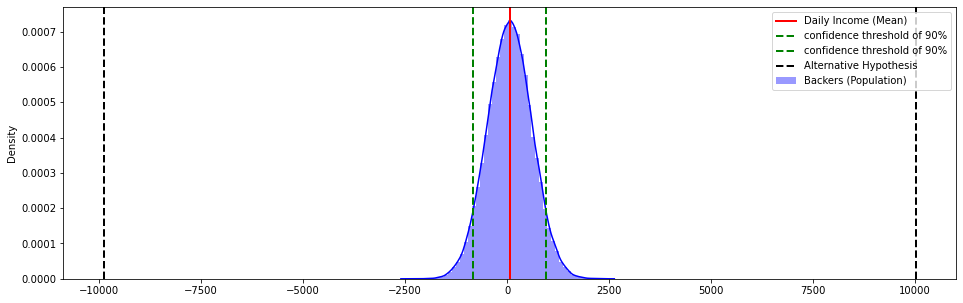

In [238]:
#visualisasi
dffv2_pop = np.random.normal(dffv2.backers.mean(), dffv2.backers.std(), 70000)

ci = stats.norm.interval(0.90, dffv2.backers.mean(), dffv2.backers.std())

plt.figure(figsize=(16,5))
sns.distplot(dffv2_pop, label='Backers (Population)', color='blue')
plt.axvline(dffv2.backers.mean(), color='red', linewidth=2, label='Daily Income (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 90%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 90%')

plt.axvline(dffv2_pop.mean() + t_stat*dffv2_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(dffv2_pop.mean() - t_stat*dffv2_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

- Berdasarkan gambar ini, nilai mean populasi lebih rendah daripada nilai mean sampel

<font size="6">**IX.Pengambilan Kesimpulan**</font>

**Central Tendency**

- Kategori dari project paling banyak muncul adalah kategori product **design**
- Kategori utama dari project paling banyak muncul adalah kategori **Film dan Video**
- Status dari project project sebagian besar banyak yang **gagal**
- Negara dimana asal project sebagian besar berasal dari **Amerika Serikat**
- Mata Uang yang digunakan untuk memberikan dana kepada project kebanayak bermata uang **Dollar**

Berdasarkan pengamatan di Central Tendency, fitur usd_pledged_real, usd_goal_real, dan backers memiliki variabilitas yang tinggi, karena:

- Selisih antara Standard Deviation dan Mean sangat besar
- Rangenya sangat lebar
- Jarak IQR(Q3-Q1 sangat besar)
- Banyak memiliki outliers (terlihat di boxplot)
- Perbedaan antara Q3 dan Max Value sangat besar
- Perbedaan jarak antara median dan Max Value sangat besar
- Bentuk dari distribusi data ini adalah positively skewed, karena nilai mean > median

Dapat disimpulkan bahwa:

- Pada platfrom kickstarter ini, banyak project - project, namun hanya ada beberapa yang berkualitas.
- Project yang berkualitas ini mendorong backers - backers untuk mempercayakan uangnya dalam jumlah besar ke project tersebut.
- Project - project yang berkualitas ini juga membutuhkan pendanaan yang cukup besar.
- Kemungkinan besar project - project yang berkualitas ini ada pada kategori Film dan Video

**Hypothesis Testing**

- Nilai P value di atas 0,05, yang berarti mempunyai cukup bukti untuk menerima H0
- Hal ini berarti bahwa rata rata Backers dari kategori film dan video tidak memiliki perbedaan yang signifikan daripada rata rata Backers dari seluruh kategori
- T Value yang negatif menunjukkan bahwa nilai mean populasi lebih rendah daripada nilai mean sampel.
- Berdasarkan gambar ini, nilai mean populasi lebih rendah daripada nilai mean sampel
